In [38]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [39]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# downloading packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
df = pd.read_csv("BA_reviews.csv")

In [16]:
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | My partner and I were on the...
1,1,Not Verified | We had a Premium Economy retur...
2,2,✅ Trip Verified | I should like to review my ...
3,3,✅ Trip Verified | We have flown with British A...
4,4,✅ Trip Verified | I sat in the plane at Vienna...


In [17]:
df = df[['reviews']]

In [18]:
# showing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [19]:
df.isnull().sum()

reviews    0
dtype: int64

In [22]:
# Define a function to check for "Trip Verified" and clean the text
def split_verification(review):
    if '✅ Trip Verified' in review:
        return 'Trip Verified', review.replace('✅ Trip Verified | ', '')
    elif 'Not Verified' in review:
        return 'Not Verified', review.replace('Not Verified | ', '')
    else:
        return 'Unknown', review

# Apply the function to each review
df[['verification_status', 'cleaned_review']] = df['reviews'].apply(split_verification).apply(pd.Series)

# Display the DataFrame
df

,reviews,verification_status,cleaned_review
0,✅ Trip Verified | My partner and I were on the...,Trip Verified,My partner and I were on the BA2166 return fli...
1,Not Verified | We had a Premium Economy retur...,Not Verified,We had a Premium Economy return flight Los An...
2,✅ Trip Verified | I should like to review my ...,Trip Verified,I should like to review my flight with Britis...
3,✅ Trip Verified | We have flown with British A...,Trip Verified,We have flown with British Airways a few times...
4,✅ Trip Verified | I sat in the plane at Vienna...,Trip Verified,I sat in the plane at Vienna airport for three...
...,...,...,...
995,✅ Trip Verified | London to Aberdeen. Before ...,Trip Verified,London to Aberdeen. Before boarding the fligh...
996,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,Trip Verified,"Gatwick to Dubrovnik. Overcrowded lounges, bu..."
997,✅ Trip Verified | I paid an extra £500 for tw...,Trip Verified,I paid an extra £500 for two Premium economy ...
998,✅ Trip Verified | Faro to Heathrow. Flight wa...,Trip Verified,Faro to Heathrow. Flight was very good no iss...


In [25]:
df['review_length'] = df['cleaned_review'].apply(len)

In [26]:
df

,reviews,verification_status,cleaned_review,Message_Length,review_length
0,✅ Trip Verified | My partner and I were on the...,Trip Verified,My partner and I were on the BA2166 return fli...,966,966
1,Not Verified | We had a Premium Economy retur...,Not Verified,We had a Premium Economy return flight Los An...,1519,1519
2,✅ Trip Verified | I should like to review my ...,Trip Verified,I should like to review my flight with Britis...,1445,1445
3,✅ Trip Verified | We have flown with British A...,Trip Verified,We have flown with British Airways a few times...,2141,2141
4,✅ Trip Verified | I sat in the plane at Vienna...,Trip Verified,I sat in the plane at Vienna airport for three...,447,447
...,...,...,...,...,...
995,✅ Trip Verified | London to Aberdeen. Before ...,Trip Verified,London to Aberdeen. Before boarding the fligh...,458,458
996,✅ Trip Verified | Gatwick to Dubrovnik. Overc...,Trip Verified,"Gatwick to Dubrovnik. Overcrowded lounges, bu...",276,276
997,✅ Trip Verified | I paid an extra £500 for tw...,Trip Verified,I paid an extra £500 for two Premium economy ...,554,554
998,✅ Trip Verified | Faro to Heathrow. Flight wa...,Trip Verified,Faro to Heathrow. Flight was very good no iss...,473,473


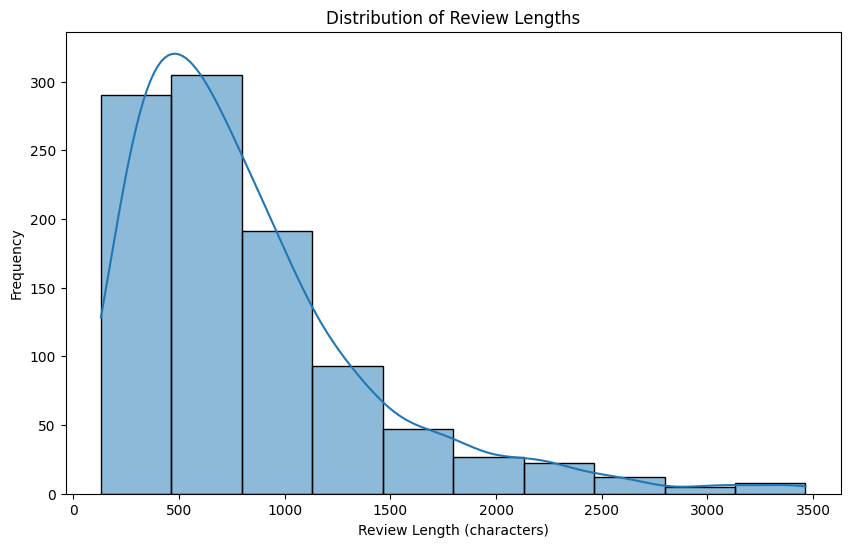

In [27]:
# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=10, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Pre processing

In [31]:
# Preprocessing function
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lower case
    text = text.lower()
    
    # Tokenize
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# Preprocess each feedback
df['preprocessed_review'] = df['cleaned_review'].apply(preprocess_text)
df[['cleaned_review', 'preprocessed_review']]

,cleaned_review,preprocessed_review
0,My partner and I were on the BA2166 return fli...,partner ba return flight tampa gatwick excited...
1,We had a Premium Economy return flight Los An...,premium economy return flight los angeles lond...
2,I should like to review my flight with Britis...,like review flight british airway hannover lon...
3,We have flown with British Airways a few times...,flown british airway time last trip far worst ...
4,I sat in the plane at Vienna airport for three...,sat plane vienna airport three hour didnt take...
...,...,...
995,London to Aberdeen. Before boarding the fligh...,london aberdeen boarding flight forced check b...
996,"Gatwick to Dubrovnik. Overcrowded lounges, bu...",gatwick dubrovnik overcrowded lounge business ...
997,I paid an extra £500 for two Premium economy ...,paid extra two premium economy seat long haul ...
998,Faro to Heathrow. Flight was very good no iss...,faro heathrow flight good issue yet baggage co...


# Word cloud of the reviews

In [32]:
# Join all reviews into a single string
all_reviews = ' '.join(df['preprocessed_review'])

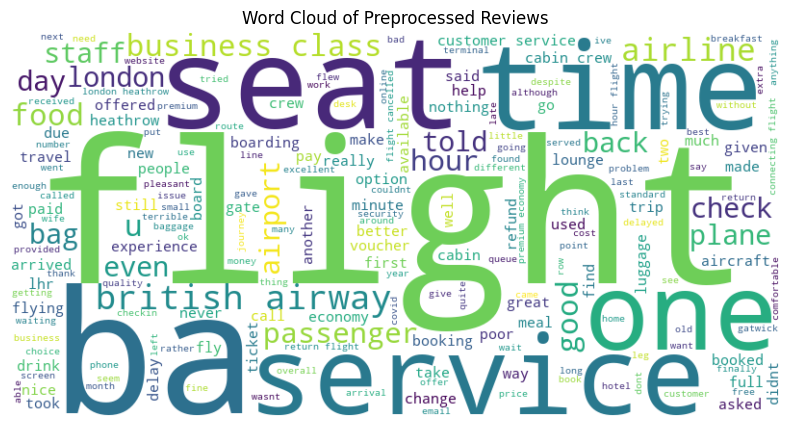

In [33]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Reviews')
plt.show()

Number of unique words: 6779


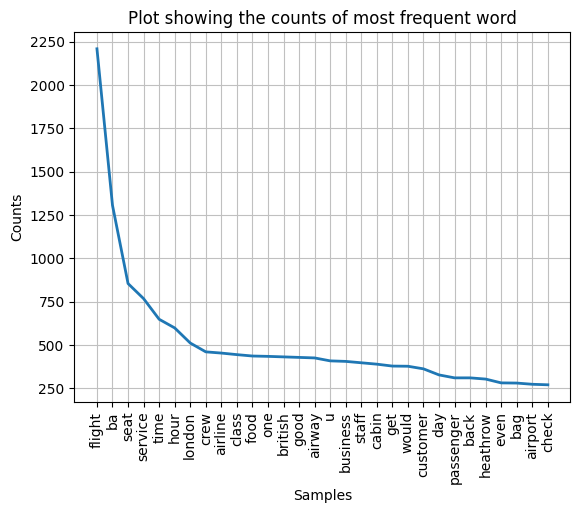

In [37]:
#Plot showing the counts of most frequent word
all_text = ' '. join(df['preprocessed_review'])
tokens = word_tokenize(all_text)
freq_dist = FreqDist(tokens)
unique_word_count = len(freq_dist)
print(f"Number of unique words: {unique_word_count}")
freq_dist.plot(30, cumulative = False, title = 'Plot showing the counts of most frequent word')
plt.show()

In [40]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    return analyzer.polarity_scores(text)

In [42]:
# Apply sentiment analysis to each review
df['sentiment'] = df['cleaned_review'].apply(analyze_sentiment)

# Extract sentiment scores
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])
df['neg'] = df['sentiment'].apply(lambda x: x['neg'])
df['neu'] = df['sentiment'].apply(lambda x: x['neu'])
df['pos'] = df['sentiment'].apply(lambda x: x['pos'])

# Display the DataFrame with sentiment scores
df[['cleaned_review', 'compound', 'neg', 'neu', 'pos']]

,cleaned_review,compound,neg,neu,pos
0,My partner and I were on the BA2166 return fli...,0.9514,0.045,0.830,0.125
1,We had a Premium Economy return flight Los An...,0.9034,0.095,0.782,0.123
2,I should like to review my flight with Britis...,0.9913,0.008,0.839,0.152
3,We have flown with British Airways a few times...,-0.9832,0.094,0.874,0.031
4,I sat in the plane at Vienna airport for three...,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
995,London to Aberdeen. Before boarding the fligh...,0.3404,0.064,0.847,0.089
996,"Gatwick to Dubrovnik. Overcrowded lounges, bu...",0.3612,0.036,0.898,0.066
997,I paid an extra £500 for two Premium economy ...,-0.7215,0.125,0.809,0.066
998,Faro to Heathrow. Flight was very good no iss...,-0.9701,0.235,0.714,0.051


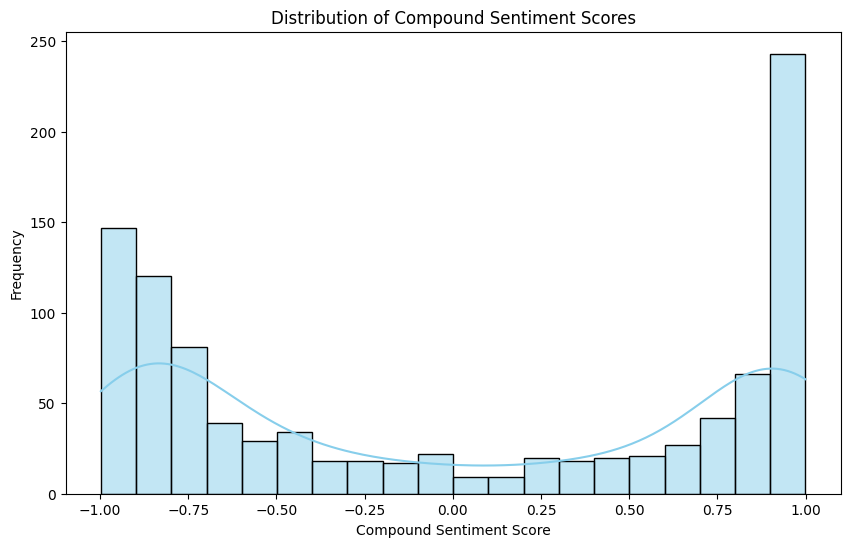

In [43]:
# Plot distribution of compound sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['compound'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Classify sentiments based on compound score
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_class'] = df['compound'].apply(classify_sentiment)

# Display the DataFrame with sentiment classes
df[['cleaned_review', 'compound', 'sentiment_class']]

,cleaned_review,compound,sentiment_class
0,My partner and I were on the BA2166 return fli...,0.9514,Positive
1,We had a Premium Economy return flight Los An...,0.9034,Positive
2,I should like to review my flight with Britis...,0.9913,Positive
3,We have flown with British Airways a few times...,-0.9832,Negative
4,I sat in the plane at Vienna airport for three...,0.0000,Neutral
...,...,...,...
995,London to Aberdeen. Before boarding the fligh...,0.3404,Positive
996,"Gatwick to Dubrovnik. Overcrowded lounges, bu...",0.3612,Positive
997,I paid an extra £500 for two Premium economy ...,-0.7215,Negative
998,Faro to Heathrow. Flight was very good no iss...,-0.9701,Negative


In [47]:
df['cleaned_review'][3]

"We have flown with British Airways a few times but this last trip was by far the worst experience. We weren't able to check in online because the system wouldn't accept any of our passport info, so we had to wait to check in upon arrival at the airport. We arrived two hours before our scheduled departure. The line was backed up with only 4 stations being staffed where there was room for at least 6 more attendants to help expedite check in. We talked to a few people in line and they too were unable to check in online. It took the desk attendants an hour to check in the people ahead of us. We told the agent we had tried to check in online but it wouldn't accept our passports, she replied it was because they need to verify each passport personally. I asked that wouldn't they verify them that way anyway? I also let her know we attempted to move closer to the front of the plane and could see there were seats available but couldn't secure them because we couldn't finish check in. She went o

/var/folders/rg/qq64bhyd5r59ck6l1fd3gpp40000gn/T/ipykernel_843/3939357169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_class', data=df, palette='viridis')


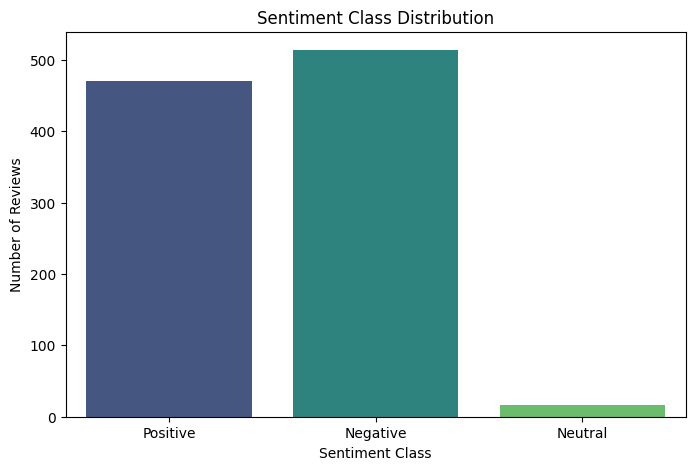

In [48]:
# Plot sentiment class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_class', data=df, palette='viridis')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.show()

In [52]:
value_count = df['sentiment_class'].value_counts()
value_count

sentiment_class
Negative    514
Positive    470
Neutral      16
Name: count, dtype: int64

- **Positive Reviews**: Approximately 470 reviews fall into the positive category.
- **Negative Reviews**: Around 514 reviews fall into the negative category.
- **Neutral Reviews**: Approximately 16 reviews fall into the neutral category.

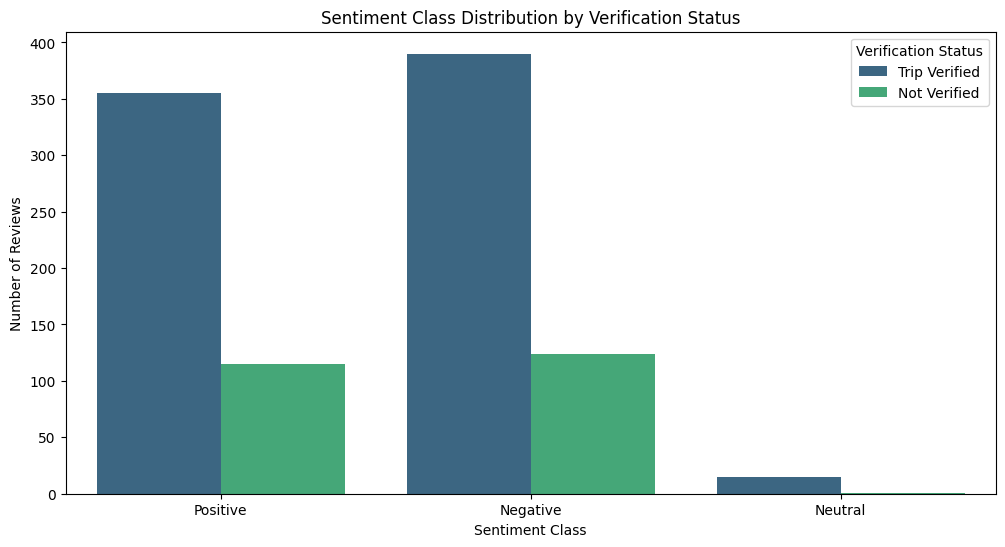

In [49]:
# Plot sentiment class distribution by verification status
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment_class', hue='verification_status', data=df, palette='viridis')
plt.title('Sentiment Class Distribution by Verification Status')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.legend(title='Verification Status')
plt.show()

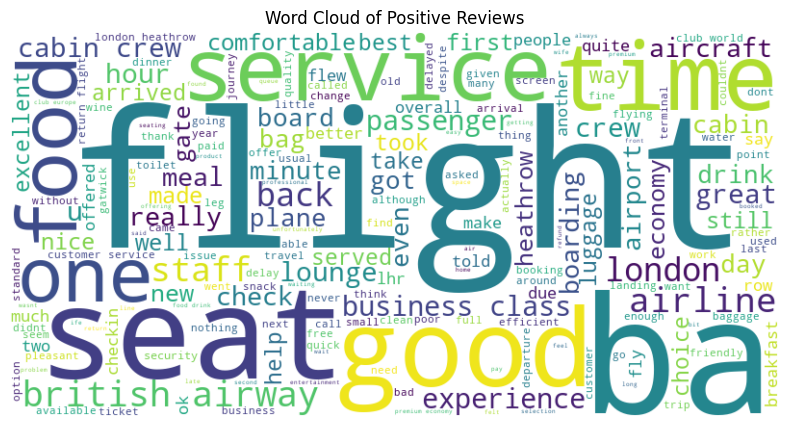

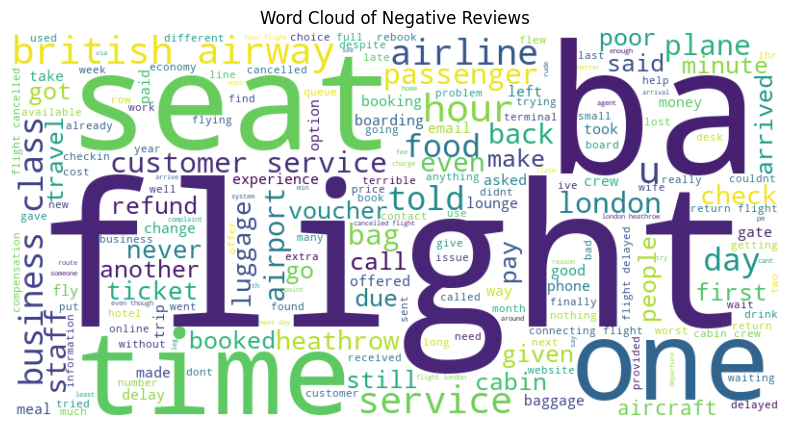

In [50]:
# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment_class'] == 'Positive']['preprocessed_review'])
negative_reviews = ' '.join(df[df['sentiment_class'] == 'Negative']['preprocessed_review'])

# Plot word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

# Plot word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()


- Strengths from positive reviews.
“good”,“flight”,“service”,“seat”,“crew”,“food”,“comfortable”,“clean”. These words represent aspects that customers appreciate.
- key areas of improvement from negative reviews.
Seat Comfort: Passengers mention discomfort related to seating arrangements.
Delays: Delays impact overall satisfaction.
Customer Service: Negative experiences with customer service representatives.
Refunds: Issues related to refunds and vouchers.
Business Class: Even premium services have notable criticisms.
Baggage Handling: Problems with baggage handling and communication.
Food: Dissatisfaction with in-flight meals.
Addressing these areas can enhance the overall passenger experience.